# 1. Importo librerías

In [8]:
import category_encoders as ce

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Matplotlib inline para visualizar los gráficos de Matplotlib
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
# Configuración para setear y que todas las fig de Seaborn salgan por defecto con este tamaño
# Se puede especificar el tamaño de cada figura
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,12.)})
sns.set_style("whitegrid")

# 2. Importo Datos

In [9]:
df = pd.read_csv("../data/datos_numericos_limpios_sin_outliers.csv")

In [10]:
df.sample(3)

,huespedes,dormitorios,camas,baños,precio_eur,valoracion,alojamiento_entero,limpieza,llegada_autonoma,ubicacion_fantastica,cocina,wifi,lavadora,aire_acondicionado,secador,frigorifico
187,6,3,6,1,132,4.64,1,1,1,0,1,1,0,1,1,0
1327,10,5,8,2,198,4.00,1,0,1,1,0,0,1,0,0,1
1214,2,1,2,1,32,4.25,0,0,1,0,1,1,1,0,0,0


In [20]:
datos = df[["huespedes", "dormitorios", "camas", "baños", "alojamiento_entero", "precio_eur", 
            "limpieza", "llegada_autonoma","lavadora", "aire_acondicionado"]]

In [21]:
precio = datos[["precio_eur"]]

# 3. Análisis de correlación

In [22]:
corr = datos.corr()

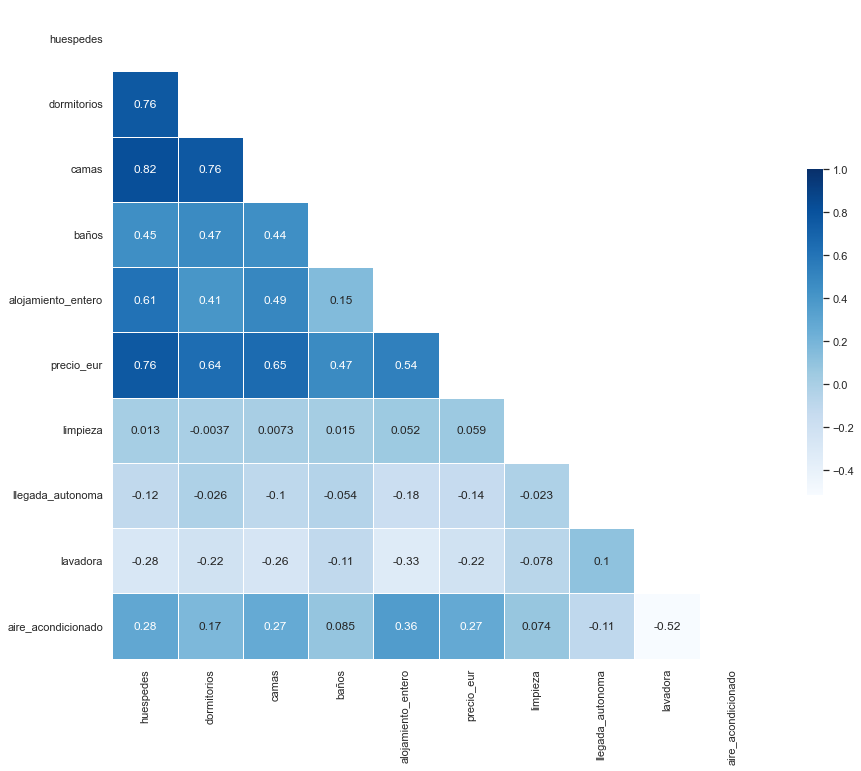

In [23]:
mascara5 = np.triu(np.ones_like(corr, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores
sns.heatmap(corr,
            mask = mascara5,
            cmap="Blues",
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            cbar_kws={"shrink": .5}, #barra lateral,
            annot=True
);

# 4. Modeling

In [24]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge, Lasso

from sklearn.linear_model import SGDRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix

In [25]:
datos.columns

Index(['huespedes', 'dormitorios', 'camas', 'baños', 'alojamiento_entero',
       'precio_eur', 'limpieza', 'llegada_autonoma', 'lavadora',
       'aire_acondicionado'],
      dtype='object')

In [26]:
y = datos.precio_eur
X = datos.drop(columns= ["precio_eur"])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [27]:
models={
    'linear': LinearRegression(),
    'ridge': Ridge(),
    'lasso': Lasso(),
    'sgd': SGDRegressor(),
    'knn': KNeighborsRegressor(),
    'grad': GradientBoostingRegressor(),
    'Tree': DecisionTreeRegressor(), 
    'forest': RandomForestRegressor(),
}

In [28]:
for name, model in models.items():
    print("ENTRENANDO: ", name)
    model.fit(X_train, y_train)

ENTRENANDO:  linear
ENTRENANDO:  ridge
ENTRENANDO:  lasso
ENTRENANDO:  sgd
ENTRENANDO:  knn
ENTRENANDO:  grad
ENTRENANDO:  Tree
ENTRENANDO:  forest


In [29]:
#Podemos seguir el mismo proceso para realizar predicciones de cada algoritmo y sacar métricas
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"------{name}------")
    print('MAE - ', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE - ', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE - ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2 - ', metrics.r2_score(y_test, y_pred))

------linear------
MAE -  23.8790748756664
MSE -  1076.425955372928
RMSE -  32.80893103063445
R2 -  0.5923449669699437
------ridge------
MAE -  23.876382192530457
MSE -  1076.2901056791045
RMSE -  32.80686064955171
R2 -  0.5923964148295446
------lasso------
MAE -  24.06759599262045
MSE -  1079.4371156927764
RMSE -  32.85478832214228
R2 -  0.5912046055233254
------sgd------
MAE -  23.72600459754571
MSE -  1071.5392497170096
RMSE -  32.73437413052233
R2 -  0.5941956192564555
------knn------
MAE -  23.285897435897436
MSE -  1009.5122222222221
RMSE -  31.772822068903828
R2 -  0.6176859762252112
------grad------
MAE -  22.627751395309655
MSE -  1005.5472970662069
RMSE -  31.710365766830993
R2 -  0.6191875395119094
------Tree------
MAE -  22.54291039510905
MSE -  1099.0309950701098
RMSE -  33.151636386008306
R2 -  0.5837841754371831
------forest------
MAE -  21.55736987924526
MSE -  946.044054349225
RMSE -  30.757829155342304
R2 -  0.6417221098222128


In [30]:
datos["precio_eur"].mean()

94.46427043217801

In [50]:
def model(paisano):
    df = pd.read_csv("../data/datos_numericos_limpios_sin_outliers.csv")
    datos = df[["huespedes", "dormitorios", "camas", "baños", "alojamiento_entero", "precio_eur", 
            "limpieza", "llegada_autonoma","lavadora", "aire_acondicionado"]]
    
    rfr = RandomForestRegressor()
    #datitos = read_csv()
    
    #Creamos subset:
    numerical_usos = datos[["alojamiento_entero", "limpieza", "llegada_autonoma", "lavadora", "aire_acondicionado"]]

    #Creamos objecto para binary encoding:
    encoder = ce.BinaryEncoder(numerical_usos,return_df=True)
    binary_encoded = encoder.fit_transform(numerical_usos)
    
    #Concatenamos datos:
    df = binary_encoded[["alojamiento_1", "limpieza_1", "llegada_autonoma_1", "lavadora_1", "aire_1"]]
    df.columns = ["alojamiento", "limpieza", "llegada_autonoma", "lavadora", "aire"]
    categorias = datitos[["huespedes", "dormitorios", "camas", "baños", "precio_eur"]]
    
    #Este código junta las nuevas variables de usos en código binario con el df total de variables = categorías
    datos = pd.concat([categorias, df], axis=1)
    
    y = datos.precio_eur
    x = datos.drop(columns= ["precio_eur"])
    
    rfr.fit(x, y)


    #Creamos objecto para binary encoding:
    paisano_ = paisano.drop(columns = (["urls", "nombre", "ciudad", "ubicacion_fantastica", "wifi", "cocina", "frigorifico", "secador"]), axis=1, inplace=True)
    print(paisano_)
    encoder = ce.BinaryEncoder(paisano_,return_df=True)
    print(encoder)
    binary_encoded = encoder.fit_transform(paisano_)
    
    print("esto es binary encoded")
    print(binary_encoded.columns)
    
    #Concatenamos datos:
    df_ = binary_encoded[["alojamiento_0", "limpieza_0", "llegada_autonoma_0", "lavadora_0", "aire_0"]]
    #print(df_)
    binary_encoded.columns = ["alojamiento", "limpieza", "llegada_autonoma", "lavadora", "aire"]
    categorias_ = paisano[["huespedes", "dormitorios", "camas", "baños", "precio_eur"]]
    #Este código junta las nuevas variables de usos en código binario con el df total de variables = categorías
    datos_ = pd.concat([categorias_, binary_encoded], axis=1)

    y = datos_.precio_eur
    x = datos_.drop(columns= ["precio_eur"])

    y_pred = rfr.predict(categorias_)

    return y_pred

In [51]:
model(datos)

KeyError: "None of [Index(['alojamiento_1', 'limpieza_1', 'llegada_autonoma_1', 'lavadora_1',\n       'aire_1'],\n      dtype='object')] are in the [columns]"

# forest

In [ ]:
""" 
#Hiperparámetros tuneables de RandomForest
parameters = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
"""

In [ ]:
#Reducimos para hacer la prueba con diferentes n_estimators
params = {
     
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],

}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Guardo en una variable raandom forest
rfc = RandomForestClassifier()

In [ ]:
# Guardo el grid search con el algoritmo, los parámetros y verbose paraa que muestre info del proceso
grid = GridSearchCV(rfc, params, verbose=1)

In [ ]:
#Guardo el grid search con el algoritmo, los parámetros y verbose paraa que muestre info del proceso
grid = GridSearchCV(rfc, params, verbose=1)

In [ ]:
# entreno el grid con los datos de train
grid.fit(X_train,y_train)

In [ ]:
# Imprimo los mejores parámetros que me ha dado el modelo
print(grid.best_params_)

In [ ]:
# Entreno
rfc_params = RandomForestClassifier(n_estimators = 400, min_samples_leaf= 1, min_samples_split= 2, max_depth= 80)

In [ ]:
rfc_params.fit(X_train,y_train)

In [ ]:
y_pred = rfc_params.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

In [ ]:
print ("Accuracy", round(accuracy_score(y_test,y_pred),3))
print("Precission",round(precision_score(y_test,y_pred, average = "weighted"),3))
print("Recall", round(recall_score(y_test,y_pred, average = "weighted"),3))
print("F1_score", round(f1_score(y_test,y_pred,average= "weighted"),3))
print('RMSE - ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# xgb

In [ ]:
import xgboost as xgb

In [ ]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

clf_xgb.fit(X_train, y_train)
preds_xgb = clf_xgb.predict(X_test)

In [ ]:
accuracy_xgb = float(np.sum(preds_xgb == y_test))/y_test.shape[0]

print('Accuracy de XGBoost: ', accuracy_xgb)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)


In [ ]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

In [ ]:
from sklearn.model_selection import StratifiedKFold
import math
from sklearn.model_selection import GridSearchCV

In [ ]:
# TAKES TIME
n_estimators = [80, 100, 120, 140, 160]
max_depth = [4, 5, 6, 7, 8, 9, 10]
learning_rate = [0.0001, 0.001, 0.005, 0.01, 0.1, 0.2, 0.3, 0.04]

param_grid = dict(max_depth = max_depth, n_estimators = n_estimators, learning_rate=learning_rate)

kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 10)

grid_search_xg_freq = GridSearchCV(xgb_freq, param_grid, scoring = 'r2', n_jobs = -1, cv=kfold, verbose = 1)
result_gcv_xgb_freq = grid_search_xg_freq.fit(X_train, y_train.astype(int))

print("Best score: %f using %s" % (result_gcv_xgb_freq.best_score_, result_gcv_xgb_freq.best_params_))

means = result_gcv_xgb_freq.cv_results_['mean_test_score']
stds = result_gcv_xgb_freq.cv_results_['std_test_score']
params = result_gcv_xgb_freq.cv_results_['params']

In [ ]:
# Rebuilding using the best parameters:
xgb_freq = xgb.XGBRegressor(n_estimators=140, learning_rate=0.04,max_depth=5)

xgb_freq.fit(X_train,y_train)
predictions_xgb_freq = xgb_freq.predict(X_test)
#print("R squared is {}".format(explained_variance_score(predictions_xgb_freq,y_test)))
rmse = np.sqrt(mean_squared_error(y_test, predictions_xgb_freq))
print("RMSE: %f" % (rmse))